In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#1. Nạp dữ liệu

In [2]:
import pandas as pd
from google.colab import files
import io

# 1. Tải file từ máy tính lên (Chọn file data.csv của bạn)
print("Vui lòng upload file data.csv:")
uploaded = files.upload()

# 2. Lấy tên file vừa upload (để tránh lỗi nếu tên file khác 'data.csv')
filename = next(iter(uploaded))

# 3. Đọc dữ liệu vào DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Hiển thị dữ liệu
df

Vui lòng upload file data.csv:


Saving data.csv to data.csv


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


#2. KIểm tra dữ liệu

##2.1. Thông tin

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


##2.2. Mô tả

In [4]:
df.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


#2.3. Đếm số lượng giá trị bị thiếu

In [5]:
df.isna().sum()

,0
AnimalName,0
symptoms1,0
symptoms2,0
symptoms3,0
symptoms4,0
symptoms5,0
Dangerous,2


#3. TIỀN XỬ LÝ & KỸ THUẬT ĐẶC TRƯNG

In [11]:
# --- PHẦN 2: TIỀN XỬ LÝ DỮ LIỆU (ĐÃ SỬA THEO CỘT CỦA BẠN) ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# 1. XÁC ĐỊNH MỤC TIÊU VÀ ĐẶC TRƯNG
target_col = 'Dangerous'

# Kiểm tra xem cột target có trong data không
if target_col not in df.columns:
    raise ValueError(f"Không tìm thấy cột '{target_col}' trong dữ liệu!")

# Xóa dữ liệu thiếu và trùng lặp
print(f"Số dòng trước khi làm sạch: {len(df)}")
df = df.dropna()
df = df.drop_duplicates()
print(f"Số dòng sau khi làm sạch: {len(df)}")

# 2. TÁCH BIẾN ĐỘC LẬP (X) VÀ BIẾN MỤC TIÊU (y)
X = df.drop([target_col], axis=1)
y = df[target_col]

# 3. MÃ HÓA CỘT MỤC TIÊU (Target Encoding)
# Chuyển 'Yes'/'No' hoặc nhãn chữ thành số 0, 1
le = LabelEncoder()
y = le.fit_transform(y)

print("\n--- CÁC LỚP MỤC TIÊU (TARGET CLASSES) ---")
for i, class_name in enumerate(le.classes_):
    print(f"Lớp {i}: {class_name}")

# 4. CHIA TẬP TRAIN/TEST
# Chia 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nKích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

# 5. THIẾT LẬP BỘ XỬ LÝ (PREPROCESSOR)
# Vì dữ liệu của bạn toàn bộ là chữ (Tên con vật, Triệu chứng), ta sẽ dùng OneHotEncoder cho TẤT CẢ các cột.
# Không có cột số nào (như tuổi, cân nặng) nên không cần StandardScaler cho X.

categorical_features = X.columns.tolist() # Lấy tất cả các cột còn lại làm cột phân loại

print(f"\nCác cột sẽ được mã hóa (One-Hot): {categorical_features}")

# Tạo bộ xử lý: Chỉ cần OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Giữ nguyên các cột khác nếu có (dù ở đây không có)
)



Số dòng trước khi làm sạch: 841
Số dòng sau khi làm sạch: 841

--- CÁC LỚP MỤC TIÊU (TARGET CLASSES) ---
Lớp 0: No
Lớp 1: Yes

Kích thước tập Train: (672, 6)
Kích thước tập Test: (169, 6)

Các cột sẽ được mã hóa (One-Hot): ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']


#4. HUẤN LUYỆN VÀ TỐI ƯU HÓA SVM (MODELING) ---

In [12]:


from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 1. Khởi tạo Pipeline
# Kết hợp bộ tiền xử lý (preprocessor) và thuật toán SVM
# probability=True để sau này có thể tính xác suất nếu cần
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(probability=True, random_state=42))
])

# 2. Thiết lập lưới tham số để tìm kiếm (Hyperparameter Tuning)
# Chúng ta sẽ thử nhiều cấu hình khác nhau để tìm ra bộ tốt nhất
param_grid = {
    'svm__C': [0.1, 1, 10, 100],        # Độ phạt lỗi (C càng lớn càng ít chấp nhận lỗi)
    'svm__kernel': ['linear', 'rbf'],   # Thử cả nhân tuyến tính và phi tuyến
    'svm__gamma': ['scale', 'auto']     # Hệ số cho kernel RBF
}

print("Đang huấn luyện và tìm tham số tối ưu cho SVM...")
print("Quá trình này có thể mất vài phút tùy vào kích thước dữ liệu...")

# 3. Chạy GridSearchCV
# cv=5: Kiểm tra chéo 5 lần (chia dữ liệu làm 5 phần để học và thi thử)
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1, # Sử dụng tất cả nhân CPU
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

# 4. Lưu kết quả tốt nhất
best_model = grid_search.best_estimator_

print("\n--- HUẤN LUYỆN HOÀN TẤT ---")
print(f"Tham số tốt nhất (Best Params): {grid_search.best_params_}")
print(f"Độ chính xác tốt nhất trên tập Train (Best Score): {grid_search.best_score_:.4f}")

Đang huấn luyện và tìm tham số tối ưu cho SVM...
Quá trình này có thể mất vài phút tùy vào kích thước dữ liệu...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- HUẤN LUYỆN HOÀN TẤT ---
Tham số tốt nhất (Best Params): {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Độ chính xác tốt nhất trên tập Train (Best Score): 0.9911


Ở bước này, chúng tôi xây dựng mô hình SVM và áp dụng kỹ thuật tinh chỉnh tham số GridSearchCV.

* Pipeline: Giúp đóng gói quy trình xử lý dữ liệu và huấn luyện mô hình thành một khối thống nhất, tránh rò rỉ dữ liệu (data leakage) và dễ dàng triển khai sau này.

* Tối ưu hóa tham số (Hyperparameter Tuning): Thay vì chọn ngẫu nhiên, chúng tôi để máy tính tự động thử nghiệm các tổ hợp tham số khác nhau của SVM:

* Kernel: So sánh hiệu quả giữa nhân tuyến tính ('linear') và nhân phi tuyến ('rbf') để xem ranh giới quyết định của dữ liệu phù hợp với dạng nào.

* C (Regularization): Tìm mức độ phạt lỗi tối ưu để cân bằng giữa việc học tốt trên tập huấn luyện và khả năng dự đoán tổng quát trên dữ liệu mới.

* Kiểm chứng chéo (Cross-Validation): Sử dụng K-fold (k=5) để đảm bảo độ chính xác của mô hình là đáng tin cậy và ổn định, không phụ thuộc vào một các chia dữ liệu ngẫu nhiên nào.

#5. Đánh giá mô hình

------------------------------------------------------
ĐỘ CHÍNH XÁC (ACCURACY): 100.00%
------------------------------------------------------

--- BÁO CÁO PHÂN LOẠI (CLASSIFICATION REPORT) ---
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00       165

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



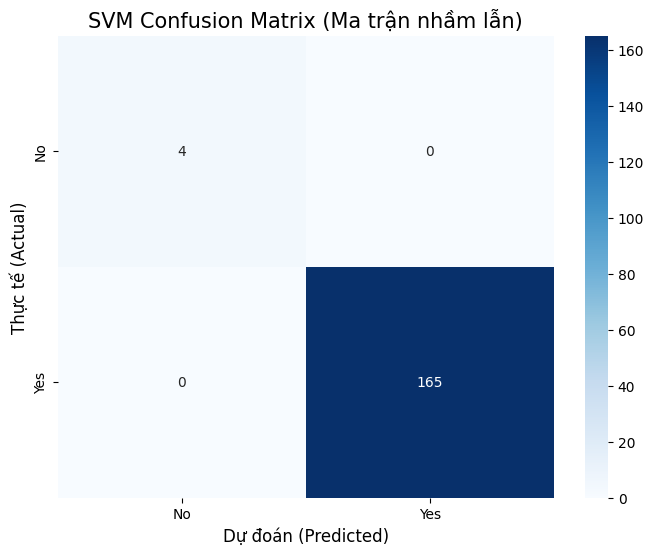

In [13]:


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dự đoán trên tập kiểm tra (Test Set)
# Tập này mô hình chưa từng nhìn thấy khi huấn luyện
y_pred = best_model.predict(X_test)

# 2. Tính toán độ chính xác tổng thể
accuracy = accuracy_score(y_test, y_pred)
print("------------------------------------------------------")
print(f"ĐỘ CHÍNH XÁC (ACCURACY): {accuracy:.2%}")
print("------------------------------------------------------")

# 3. Báo cáo chi tiết (Precision, Recall, F1-Score)
# target_names giúp hiển thị tên lớp thật (VD: Yes/No) thay vì số 0, 1
print("\n--- BÁO CÁO PHÂN LOẠI (CLASSIFICATION REPORT) ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 4. Vẽ Ma trận nhầm lẫn (Confusion Matrix)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

# Vẽ Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title('SVM Confusion Matrix (Ma trận nhầm lẫn)', fontsize=15)
plt.xlabel('Dự đoán (Predicted)', fontsize=12)
plt.ylabel('Thực tế (Actual)', fontsize=12)
plt.show()